In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
messages = [line.rstrip() for line in open('C:\\Users\\tomee\\Downloads\\sentiment labelled sentences\\sentiment labelled sentences\\amazon_cells_labelled.txt')]
print(len(messages))

1000


In [3]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 So there is no way for me to plug it in here in the US unless I go by a converter.	0


1 Good case, Excellent value.	1


2 Great for the jawbone.	1


3 Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0


4 The mic is great.	1


5 I have to jiggle the plug to get it to line up right to get decent volume.	0


6 If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0


7 If you are Razr owner...you must have this!	1


8 Needless to say, I wasted my money.	0


9 What a waste of money and time!.	0




In [4]:
import pandas as pd

In [5]:
messages = pd.read_csv('C:\\Users\\tomee\\Downloads\\sentiment labelled sentences\\sentiment labelled sentences\\amazon_cells_labelled.txt', sep='\t',
                           names=["message", "label"])
messages.head()

,message,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [6]:
#Cleaning the text


In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
print(corpus)

['way plug us unless go convert', 'good case excel valu', 'great jawbon', 'tie charger convers last minut major problem', 'mic great', 'jiggl plug get line right get decent volum', 'sever dozen sever hundr contact imagin fun send one one', 'razr owner must', 'needless say wast money', 'wast money time', 'sound qualiti great', 'impress go origin batteri extend batteri', 'two seper mere ft start notic excess static garbl sound headset', 'good qualiti though', 'design odd ear clip not comfort', 'highli recommend one blue tooth phone', 'advis everyon not fool', 'far good', 'work great', 'click place way make wonder long mechan would last', 'went motorola websit follow direct could not get pair', 'bought use kindl fire absolut love', 'commerci mislead', 'yet run new batteri two bar three day without charg', 'bought mother problem batteri', 'great pocket pc phone combin', 'own phone month say best mobil phone', 'think instruct provid help', 'peopl couldnt hear talk pull earphon talk phone', 

In [29]:
#Creating bag of words model

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = messages.iloc[:, -1].values

In [31]:
#Splitting the dataset into the Training set and Test set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [33]:
#Tfidf

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(X)


In [35]:
messages_tfidf = tfidf_transformer.transform(X)
print(messages_tfidf.shape)

(1000, 1358)


In [36]:
#Training a model

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [41]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]

In [42]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[83 13]
 [17 87]]


0.85

In [45]:
#classification report
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        96
           1       0.87      0.84      0.85       104

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



In [ ]:
#visualizing confusion matrix

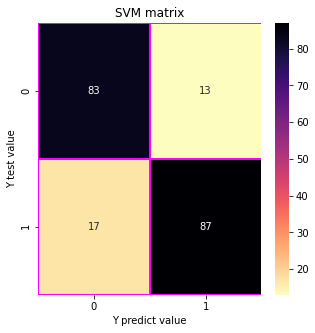

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

nb_cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nb_cm, annot=True, linewidth=0.7, linecolor='magenta', fmt='g', ax=ax, cmap="magma_r")
plt.title('SVM matrix')
plt.xlabel('Y predict value')
plt.ylabel('Y test value')
plt.show()

In [47]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [48]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.85
Precision: 0.87
Recall: 0.8365384615384616


In [ ]:
#text preprocessing, pipeline method

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [50]:
#Tfidf

In [51]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

In [52]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',SVC(kernel = 'linear', random_state = 0) ),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [55]:
from sklearn.model_selection import train_test_split
X = messages['message']
y = messages['label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [56]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC(kernel='linear', random_state=0))])

In [57]:
predictions = pipeline.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[146  25]
 [ 26 103]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       171
           1       0.80      0.80      0.80       129

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [60]:
print("Accuracy:",accuracy_score(y_test, predictions))
print("Precision:",precision_score(y_test, predictions))
print("Recall:",recall_score(y_test, predictions))

Accuracy: 0.83
Precision: 0.8046875
Recall: 0.7984496124031008
